In [5]:
import random
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import confusion_matrix_pretty_print
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data

from sklearn.metrics import confusion_matrix,classification_report,precision_score, auc, precision_recall_curve, roc_curve

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Softmax, Dropout
from keras import optimizers
from keras import metrics as kmetr
from keras.utils import plot_model


In [6]:
zeros = pd.read_csv('../../probZeroDrug30000.csv')

In [7]:
dataTrain = pd.read_csv('../../tripleTrain42702.csv')
dataTest = pd.read_csv('../../tripleTest42702.csv')


In [8]:
r,c = zeros.shape

In [9]:
dataTrain = dataTrain.append(zeros.iloc[:int(0.9*r),:], ignore_index = True) 

In [10]:
dataTest = dataTest.append(zeros.iloc[int(0.9*r):,:], ignore_index = True) 

In [11]:
del zeros
# del probableZero

In [12]:
# Shuffle datasets
dataTrain = dataTrain.sample(frac=1).reset_index(drop=True)
dataTest = dataTest.sample(frac=1).reset_index(drop=True)

In [13]:
dataTrain.head()

,0,1,2,3,4,5,6,7,8,9,...,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140
0,DB00980,DB00313,1,0.001590,0.001648,0.001679,0.001802,0.001611,0.001764,0.002200,...,0.001630,0.001612,0.001597,0.001634,0.001615,0.001882,0.001720,0.001622,0.001650,0.001595
1,DB01065,DB00356,1,0.001737,0.001782,0.001662,0.001861,0.001719,0.001912,0.001846,...,0.001600,0.001611,0.001761,0.001595,0.001613,0.001578,0.001590,0.001650,0.001819,0.001601
2,DB00231,DB01024,0,0.001689,0.001676,0.001871,0.001818,0.001685,0.001836,0.001708,...,0.001586,0.001723,0.001629,0.001688,0.001610,0.001697,0.001636,0.001656,0.001669,0.001698
3,DB01099,DB07615,1,0.001657,0.001663,0.001659,0.001577,0.001612,0.001577,0.001572,...,0.001826,0.001605,0.001598,0.001603,0.002471,0.002065,0.001828,0.001714,0.539738,0.001628
4,DB00178,DB00422,-1,0.001599,0.001608,0.001828,0.001673,0.001711,0.001638,0.001632,...,0.001582,0.001633,0.003688,0.001812,0.001694,0.001573,0.001580,0.001600,0.001598,0.001585


In [14]:
X_train = dataTrain.values[:,3:]
y_train = dataTrain.values[:,2].astype(int)
del dataTrain
trainNum = len(X_train)
X_test = dataTest.values[:,3:]
y_test = dataTest.values[:,2].astype(int)
# del dataTest
testNum = len(X_test)

#reshape data to fit model
X_train = X_train.reshape(trainNum,16,71,1)
X_test = X_test.reshape(testNum,16,71,1)

y_train = y_train + 1
y_test  = y_test + 1
# y_train = y_train / 2
# y_test  = y_test / 2
# print(y_train[0], y_test[0])

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# y_test[0]


In [15]:
print(y_train[1], y_test[0])

[0. 0. 1.] [0. 1. 0.]


In [16]:
#create model
model = Sequential()
#add model layers
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
model.add(Conv2D(128, kernel_size=4, activation='relu', input_shape=(16,71,1)))
# model.add(Conv2D(64, kernel_size=2, activation='relu'))

model.add(Conv2D(32, kernel_size=4, activation='relu'))
# model.add(Conv2D(16, kernel_size=2, activation='relu'))
model.add(Conv2D(8, kernel_size=4, activation='relu'))
model.add(Flatten())
model.add(Dense( 64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense( 16, activation='relu'))
model.add(Dense( 3, activation='sigmoid'))
# model.add(Softmax(128))
model.summary()

#compile model using accuracy to measure model performance


adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
# model.compile(loss='hinge', optimizer=adam, metrics=[kmetr.categorical_accuracy])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) ## Minist

### Load the model's saved weights.
# model.load_weights('model with zeros_3Epoch_revised.h5')





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 68, 128)       2176      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 65, 32)        65568     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 62, 8)          4104      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3472)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                222272    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_

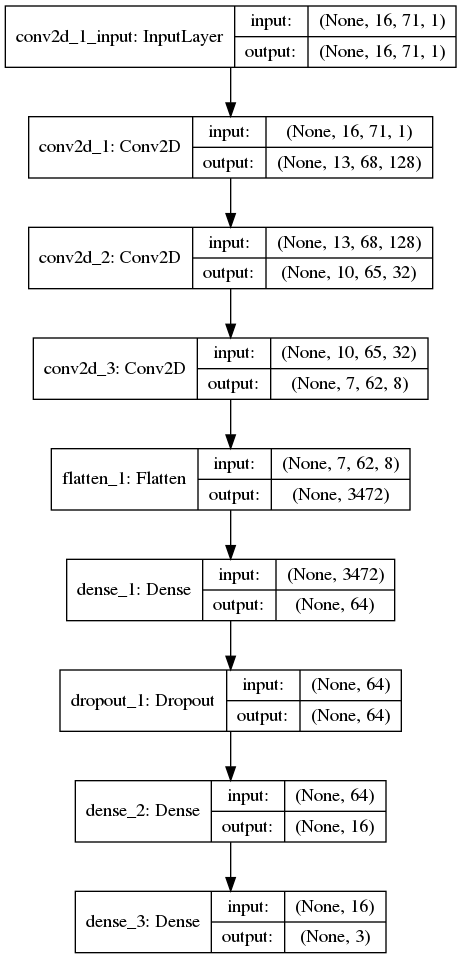

In [17]:
##### plotting model
# plot_model(model,show_shapes = True, to_file='modelTripleDDIPrediction.png')

In [18]:
# #### train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=16)
# model.fit(X_train, y_train, epochs=10)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 65800 samples, validate on 6902 samples
Epoch 1/16
65800/65800 [==============================] - 328s 5ms/step - loss: 0.6212 - acc: 0.7284 - val_loss: 0.4475 - val_acc: 0.8122
Epoch 2/16
65800/65800 [==============================] - 322s 5ms/step - loss: 0.4002 - acc: 0.8335 - val_loss: 0.3469 - val_acc: 0.8576
Epoch 3/16
65800/65800 [==============================] - 322s 5ms/step - loss: 0.3196 - acc: 0.8675 - val_loss: 0.2892 - val_acc: 0.8866
Epoch 4/16
65800/65800 [==============================] - 323s 5ms/step - loss: 0.2664 - acc: 0.8905 - val_loss: 0.2524 - val_acc: 0.9018
Epoch 5/16
65800/65800 [==============================] - 322s 5ms/step - loss: 0.2284 - acc: 0.9063 - val_loss: 0.2312 - val_acc: 0.9090
Epoch 6/16
65800/65800 [==============================] - 322s 5ms/step - loss: 0.2047 - acc: 0.9171 - val_loss: 0.2170 - val_acc: 0.9180
Epoch 7/16
65800/65800 [=====

In [19]:
### Saveing the Model
model.save_weights('modelTripleDDIPrediction_16_Epoch.h5')


In [20]:
predit = model.predict(X_test)
#actual results for first 4 images in test set
# print(predit[:4],X_test[:4,2])

In [21]:
print(predit[:4])

[[2.52487272e-01 3.33005428e-01 1.08832717e-02]
 [3.78644824e-01 2.40233541e-03 1.18881464e-04]
 [0.00000000e+00 0.00000000e+00 9.99993384e-01]
 [1.78813934e-07 4.41087812e-01 1.49011612e-07]]


In [22]:
# #from sklearn.metrics import precision_recall_curve, roc_curve

prec, rec, thr = precision_recall_curve(y_test[:,0], predit[:,0])
aupr_val = auc(rec, prec)
fpr, tpr, thr = roc_curve(y_test[:,0], predit[:,0])
auc_val = auc(fpr, tpr)
print(aupr_val,auc_val, " -1s AUPR and AUC")
print('''
Epoch 03: 72 Aupr
Epoch 04: 76 Aupr
Epoch 05: 78 Aupr
Epoch 06: 79 Aupr
Epoch 07: 80 Aupr
Epoch 08: 82 Aupr
Epoch 09: 81 Aupr
Epoch 10: 82 Aupr
Epoch 11: 79 Aupr
Epoch 12: 79 Aupr
Epoch 13: 80 Aupr
Epoch 13: 81 Aupr
''')

0.832037447873257 0.9694873838497725  -1s AUPR and AUC

Epoch 03: 72 Aupr
Epoch 04: 76 Aupr
Epoch 05: 78 Aupr
Epoch 06: 79 Aupr
Epoch 07: 80 Aupr
Epoch 08: 82 Aupr
Epoch 09: 81 Aupr
Epoch 10: 82 Aupr
Epoch 11: 79 Aupr
Epoch 12: 79 Aupr
Epoch 13: 80 Aupr
Epoch 13: 81 Aupr



In [23]:
# #from sklearn.metrics import precision_recall_curve, roc_curve

prec, rec, thr = precision_recall_curve(y_test[:,2], predit[:,2])
aupr_val = auc(rec, prec)
fpr, tpr, thr = roc_curve(y_test[:,2], predit[:,2])
auc_val = auc(fpr, tpr)
print(aupr_val,auc_val, " +1s AUPR and AUC")
print('''
Epoch 03: 95 Aupr
Epoch 04: 96 Aupr
Epoch 05: 96 Aupr
Epoch 06: 96 Aupr
Epoch 07: 96 Aupr
Epoch 08: 97 Aupr
Epoch 09: 97 Aupr
Epoch 10: 97 Aupr
Epoch 11: 95 Aupr
Epoch 12: 95 Aupr
Epoch 13: 95 Aupr
''')

0.981694790687976 0.9860346632397746  +1s AUPR and AUC

Epoch 03: 95 Aupr
Epoch 04: 96 Aupr
Epoch 05: 96 Aupr
Epoch 06: 96 Aupr
Epoch 07: 96 Aupr
Epoch 08: 97 Aupr
Epoch 09: 97 Aupr
Epoch 10: 97 Aupr
Epoch 11: 95 Aupr
Epoch 12: 95 Aupr
Epoch 13: 95 Aupr



In [24]:
# #from sklearn.metrics import precision_recall_curve, roc_curve

prec, rec, thr = precision_recall_curve(y_test[:,1], predit[:,1])
aupr_val = auc(rec, prec)
fpr, tpr, thr = roc_curve(y_test[:,1], predit[:,1])
auc_val = auc(fpr, tpr)
print(aupr_val,auc_val, " 0s AUPR and AUC")
print('''
Epoch 03: 95 Aupr
Epoch 03: 96 Aupr
Epoch 05: 96 Aupr
Epoch 06: 96 Aupr
Epoch 07: 96 Aupr
Epoch 08: 96 Aupr
Epoch 09: 97 Aupr
Epoch 10: 96 Aupr
Epoch 11: 96 Aupr
Epoch 12: 96 Aupr
Epoch 13: 96 Aupr
''')

0.9570003059479104 0.9731981889629249  0s AUPR and AUC

Epoch 03: 95 Aupr
Epoch 03: 96 Aupr
Epoch 05: 96 Aupr
Epoch 06: 96 Aupr
Epoch 07: 96 Aupr
Epoch 08: 96 Aupr
Epoch 09: 97 Aupr
Epoch 10: 96 Aupr
Epoch 11: 96 Aupr
Epoch 12: 96 Aupr
Epoch 13: 96 Aupr



In [41]:
model.history.history

{'val_loss': [0.4475433472031201,
  0.3468507172594344,
  0.28919899009407796,
  0.25243851189266525,
  0.2312004005207735,
  0.21699376290723987,
  0.2049051823218088,
  0.19255497954921838,
  0.18657360315081073,
  0.1975713523617001,
  0.1923483581093559,
  0.17879898564836594,
  0.18414355917223568,
  0.18283977479139848,
  0.17701777641158697,
  0.17845863264709305],
 'val_acc': [0.8122283395944351,
  0.8575775137986698,
  0.8865546218314678,
  0.9017676035758897,
  0.909011880597043,
  0.9179947841550882,
  0.9240799768010418,
  0.9279918863924647,
  0.9332077658476949,
  0.9319037959838874,
  0.9342219646824715,
  0.9401622718398173,
  0.9387134164355866,
  0.9392929585972788,
  0.9447986091333553,
  0.9453781512950477],
 'loss': [0.6212034362174095,
  0.40023617331742517,
  0.3196350808418993,
  0.26640941010420083,
  0.22842002868018252,
  0.20474954221250438,
  0.1829569798445267,
  0.16723300552023943,
  0.1545246672313264,
  0.14311503899269554,
  0.13365086270116927,
  0.1

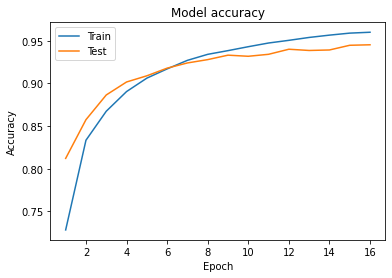

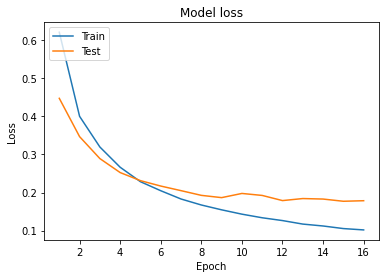

In [42]:

# Plot training & validation accuracy values
plt.plot(list(range(1,17)),model.history.history['acc'])
plt.plot(list(range(1,17)),model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(list(range(1,17)),model.history.history['loss'])
plt.plot(list(range(1,17)),model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
# # predit
# predit[:,0].shape 

In [28]:
predicts = []
for a,b,c in predit:
    if a >b and a>c:
        predicts.append(0)
    elif c>a and c>b:
        predicts.append(2)
    else:
        predicts.append(1)

In [29]:
predicts1 = []
e = d = z = 0

for a,b,c in predit:
    if a >=0.95:
        predicts1.append(0)
        d += 1
    elif b>=0.95:
        predicts1.append(2)
        e += 1
    elif a<=0.2 and b<=0.2:
        predicts1.append(1)
        z += 1
    elif c>a and c>b:
        predicts1.append(1)
        z += 1
print('degrassive', d, 'enhancive', e, 'zeros', z)
print('''
Epoch 03: degrassive 195 enhancive 732 zeros 3609
Epoch 04: degrassive 209 enhancive 747 zeros 3649
Epoch 05: degrassive 218 enhancive 720 zeros 3663
Epoch 06: degrassive 244 enhancive 797 zeros 3722
Epoch 07: degrassive 221 enhancive 848 zeros 3721
Epoch 08: degrassive 206 enhancive 729 zeros 3821
Epoch 09: degrassive 155 enhancive 961 zeros 3838
Epoch 10: degrassive 155 enhancive 750 zeros 3960
Epoch 11: degrassive 375 enhancive 1254 zeros 3476
Epoch 12: degrassive 395 enhancive 1093 zeros 3571
Epoch 13: degrassive 273 enhancive 873 zeros 3590
''')

degrassive 87 enhancive 71 zeros 4414

Epoch 03: degrassive 195 enhancive 732 zeros 3609
Epoch 04: degrassive 209 enhancive 747 zeros 3649
Epoch 05: degrassive 218 enhancive 720 zeros 3663
Epoch 06: degrassive 244 enhancive 797 zeros 3722
Epoch 07: degrassive 221 enhancive 848 zeros 3721
Epoch 08: degrassive 206 enhancive 729 zeros 3821
Epoch 09: degrassive 155 enhancive 961 zeros 3838
Epoch 10: degrassive 155 enhancive 750 zeros 3960
Epoch 11: degrassive 375 enhancive 1254 zeros 3476
Epoch 12: degrassive 395 enhancive 1093 zeros 3571
Epoch 13: degrassive 273 enhancive 873 zeros 3590



In [30]:
# max(list((dataTest.values[:,2]+1)/2))

[[ 718   57   38]
 [  51 2859   66]
 [  81   84 2948]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       850
           1       0.96      0.95      0.96      3000
           2       0.95      0.97      0.96      3052

    accuracy                           0.95      6902
   macro avg       0.93      0.92      0.93      6902
weighted avg       0.95      0.95      0.95      6902



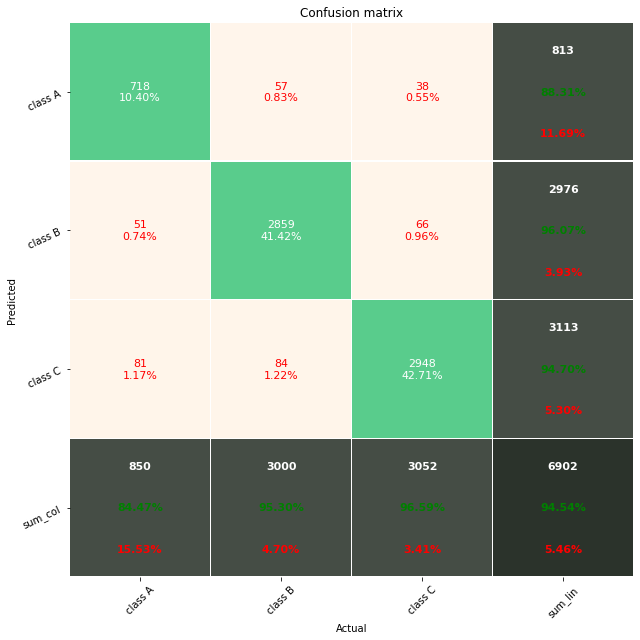


Epoch 03: 
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       914
           1       0.93      0.94      0.93      2000
           2       0.92      0.95      0.93      3396
Epoch 04:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       914
           1       0.93      0.95      0.94      2000
           2       0.93      0.96      0.95      3396
Epoch 05:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       914
           1       0.94      0.97      0.95      2000
           2       0.95      0.96      0.95      3396
Epoch 06:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       914
           1       0.94      0.96      0.95      2000
           2       0.95      0.96      0.95      3396
Epoch 07:
              precision    recall  f1-score   support

           0       0.87  

In [31]:

cm = confusion_matrix(list(predicts), list((dataTest.values[:,2]+1)))
print(cm)

CR = classification_report(list((dataTest.values[:,2]+1)),list(predicts))
print(CR)
# print((92+90+140+67+42+81)/(6950))
# i=0
# for j in list(data.values[9500:,2]+1):
#     if j==1:
#         i +=1
# print(i)

# plt.show()
plot_confusion_matrix_from_data(list((dataTest.values[:,2]+1)), list(predicts))
plt.show()
print("""
Epoch 03: 
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       914
           1       0.93      0.94      0.93      2000
           2       0.92      0.95      0.93      3396
Epoch 04:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       914
           1       0.93      0.95      0.94      2000
           2       0.93      0.96      0.95      3396
Epoch 05:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       914
           1       0.94      0.97      0.95      2000
           2       0.95      0.96      0.95      3396
Epoch 06:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       914
           1       0.94      0.96      0.95      2000
           2       0.95      0.96      0.95      3396
Epoch 07:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       914
           1       0.94      0.97      0.95      2000
           2       0.96      0.96      0.96      3396
Epoch 08: 
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       914
           1       0.95      0.97      0.96      2000
           2       0.95      0.96      0.96      3396
Epoch 09:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       914
           1       0.93      0.98      0.95      2000
           2       0.96      0.97      0.96      3396
Epoch 10:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       914
           1       0.95      0.97      0.96      2000
           2       0.96      0.97      0.96      3396
""")

In [32]:
# print(pd.DataFrame(predit))

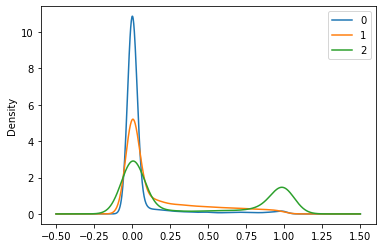

In [33]:
pd.DataFrame(predit).plot.density()
plt.show()

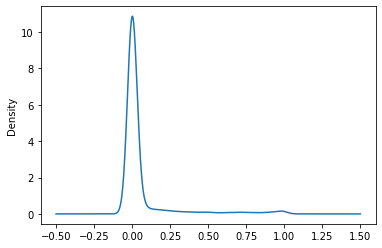

In [34]:
pd.DataFrame(predit).iloc[:,0].plot.density()
plt.show()

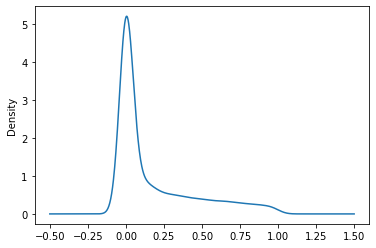

In [35]:
pd.DataFrame(predit).iloc[:,1].plot.density()
plt.show()

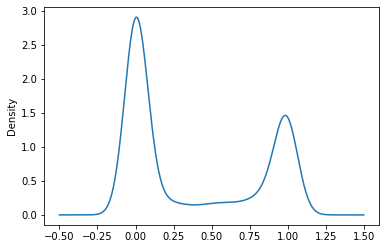

In [36]:
pd.DataFrame(predit).iloc[:,2].plot.density()
plt.show()

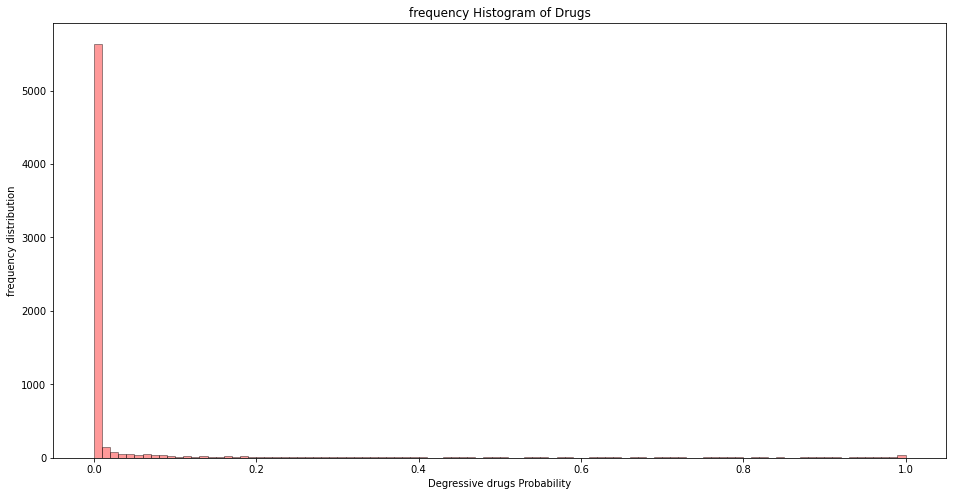

In [37]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Degressive drugs Probability')
plt.ylabel('frequency distribution')
plt.show()

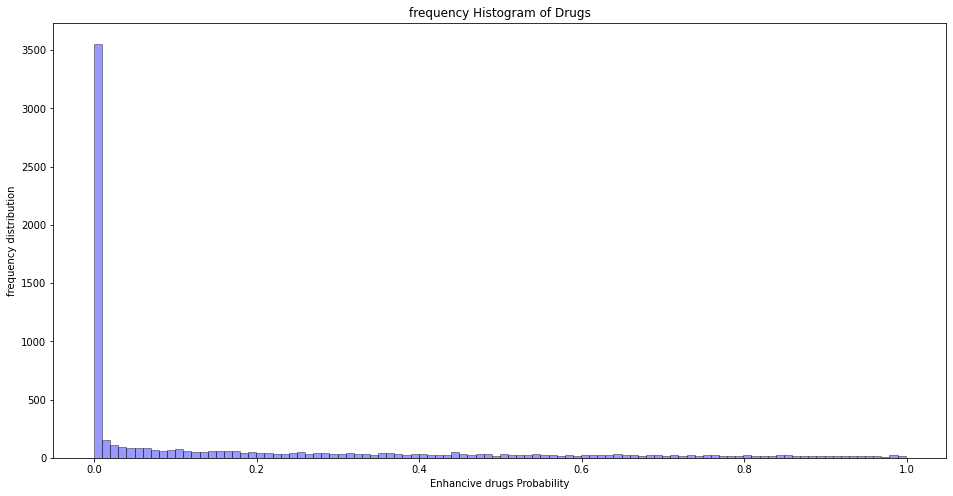

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Enhancive drugs Probability')
plt.ylabel('frequency distribution')
plt.show()

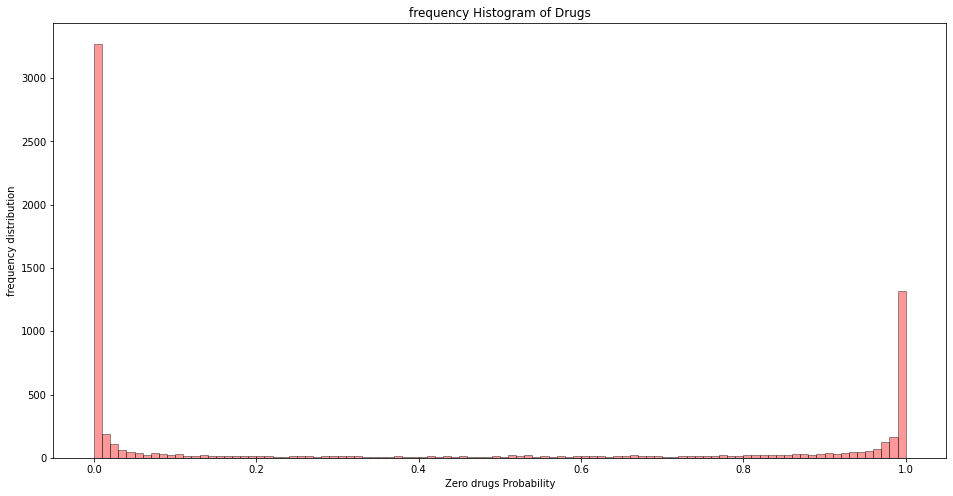

In [39]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram

sns.distplot(pd.DataFrame(predit).iloc[:,2], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Zero drugs Probability')
plt.ylabel('frequency distribution')
plt.show()

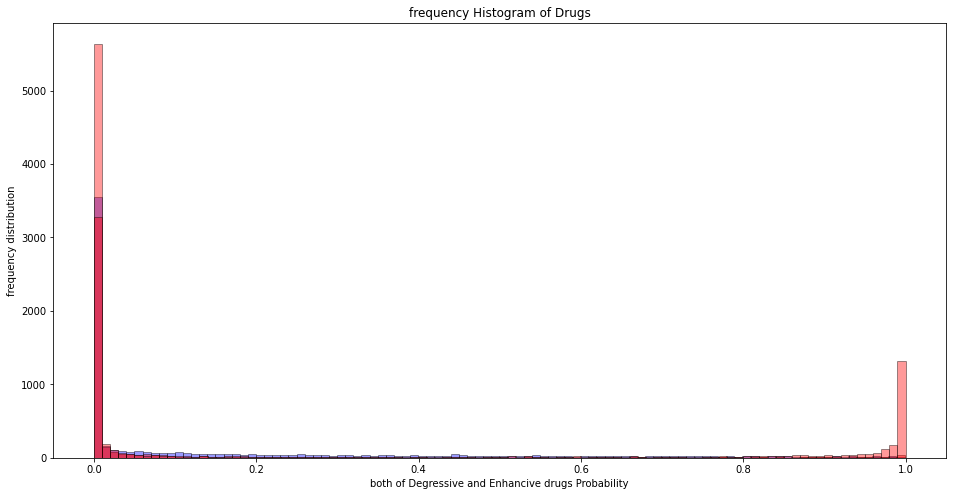

In [40]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})

sns.distplot(pd.DataFrame(predit).iloc[:,2], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('both of Degressive and Enhancive drugs Probability')
plt.ylabel('frequency distribution')
plt.show()